### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import Regression
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
import sys
import copy
import math
from scipy.stats import chi2


import warnings
from pandas.core.common import SettingWithCopyWarning



warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
df = pd.read_excel('Telco-Customer-Churn.xlsx')
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.iloc[0].T

CustomerID            0002-ORFBO
Gender                    Female
SeniorCitizen                 No
Partner                      Yes
Dependents                   Yes
Tenure                         9
PhoneService                 Yes
MultipleLines                 No
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection              No
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                One year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges              65.6
TotalCharges               593.3
Churn                         No
Name: 0, dtype: object

In [5]:
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df = df.dropna().reset_index()
df.isna().sum()

index               0
CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,index,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,3522.306314,32.421786,64.798208,2283.300441
std,2034.073173,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,1759.750000,9.000000,35.587500,401.450000
50%,3524.500000,29.000000,70.350000,1397.475000
75%,5283.250000,55.000000,89.862500,3794.737500
max,7042.000000,72.000000,118.750000,8684.800000


In [8]:
df.columns

Index(['index', 'CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [9]:
target = 'Churn'
cat_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'Contract', 'PaperlessBilling']
    
int_cols = ['MonthlyCharges', 'Tenure', 'TotalCharges']
pred_vars = cat_cols + int_cols

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#### Question 1

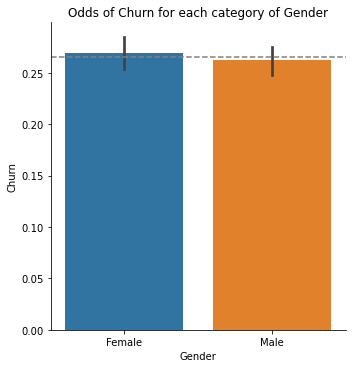

Odds of Churn for each category of Gender:
Female: 0.3691037735849057 (Higher than average)
Male: 0.3550973654066437 (Higher than average)


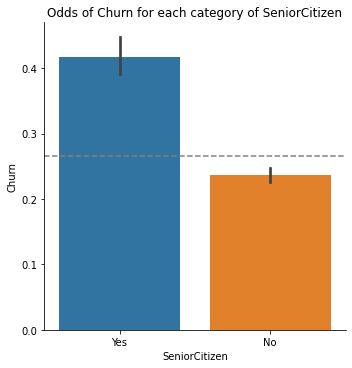

Odds of Churn for each category of SeniorCitizen:
Yes: 0.7147147147147146 (Higher than average)
No: 0.3097620635979542 (Higher than average)


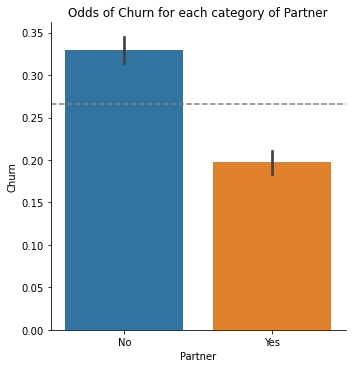

Odds of Churn for each category of Partner:
No: 0.49200492004920054 (Higher than average)
Yes: 0.24559471365638766 (Lower than average)


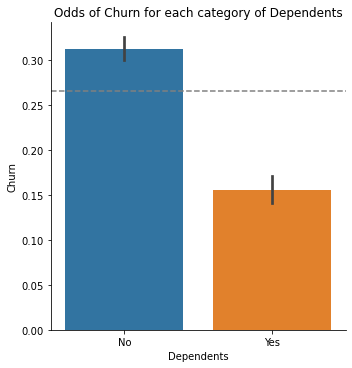

Odds of Churn for each category of Dependents:
No: 0.45516224188790555 (Higher than average)
Yes: 0.18386914833615342 (Lower than average)


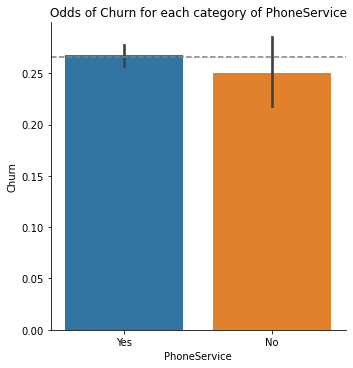

Odds of Churn for each category of PhoneService:
Yes: 0.3651407693960886 (Higher than average)
No: 0.3333333333333333 (Higher than average)


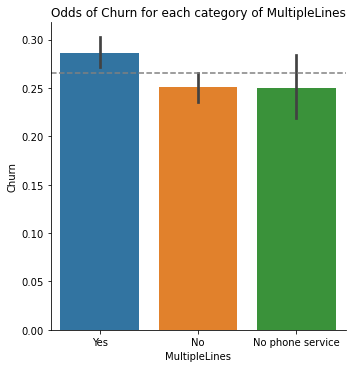

Odds of Churn for each category of MultipleLines:
Yes: 0.4015115729806329 (Higher than average)
No: 0.3347791798107256 (Higher than average)
No phone service: 0.3333333333333333 (Higher than average)


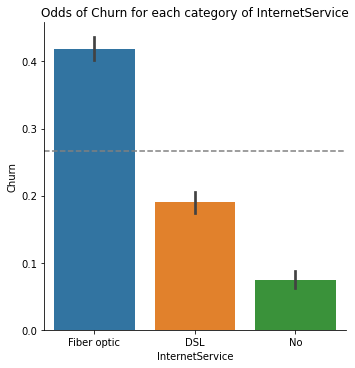

Odds of Churn for each category of InternetService:
Fiber optic: 0.7209560867148416 (Higher than average)
DSL: 0.23454266734798163 (Lower than average)
No: 0.08031272210376687 (Lower than average)


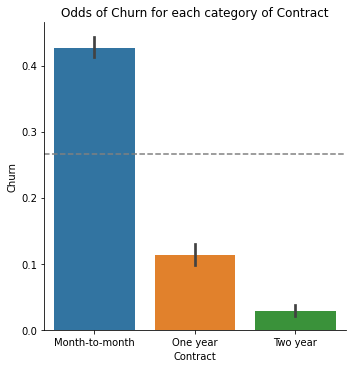

Odds of Churn for each category of Contract:
Month-to-month: 0.7454954954954955 (Higher than average)
One year: 0.12710566615620214 (Lower than average)
Two year: 0.029321930360415395 (Lower than average)


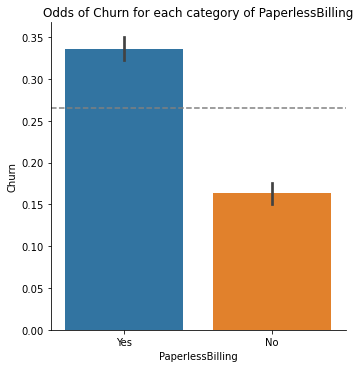

Odds of Churn for each category of PaperlessBilling:
Yes: 0.5057803468208092 (Higher than average)
No: 0.19582463465553238 (Lower than average)


In [10]:

def plot_categorical_predictors(data, target):
    # Group data by categorical predictors and calculate odds of churn for each category
    for predictor in data.columns:
        if predictor in cat_cols:
            target_mean = data.groupby(predictor)[target].mean()
            odds = target_mean / (1 - target_mean)
            odds = odds.sort_values(ascending=False)
            
            # Plot bar chart and add reference line
            sns.catplot(x=predictor, y=target, data=data, kind='bar', order=odds.index)
            plt.axhline(data[target].mean(), color='gray', linestyle='dashed')
            plt.title('Odds of Churn for each category of ' + predictor)
            plt.show()
            
            # Print odds of churn for each category and comment on its impact on the target variable
            print('Odds of Churn for each category of ' + predictor + ':')
            for category, odd in odds.iteritems():
                if odd > data[target].mean():
                    print(category + ': ' + str(odd) + ' (Higher than average)')
                else:
                    print(category + ': ' + str(odd) + ' (Lower than average)')

# Call plot_categorical_predictors function
plot_categorical_predictors(df, target)


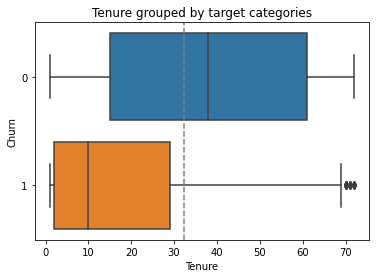

Tenure mean: 32.421786120591584
May affect the target variable as it has lower values for one target category and higher values for the other


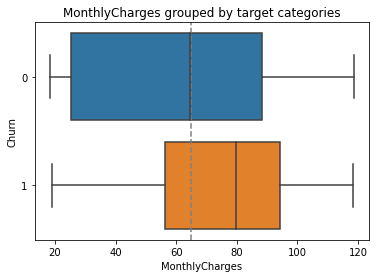

MonthlyCharges mean: 64.7982081911263
May affect the target variable as it has higher values for one target category and lower values for the other


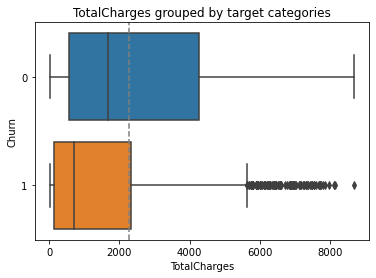

TotalCharges mean: 2283.3004408418633
May affect the target variable as it has lower values for one target category and higher values for the other


In [11]:
def plot_interval_predictors(data, target):
    # Plot horizontal boxplot for each interval predictor
    for predictor in data.columns:
        if predictor in int_cols:
            sns.boxplot(x=predictor, y=target, data=data, orient='h')
            plt.axvline(data[predictor].mean(), color='gray', linestyle='dashed')
            plt.title(predictor + ' grouped by target categories')
            plt.show()
            
            # Print mean of interval predictor and comment on its impact on the target variable
            print(predictor + ' mean: ' + str(data[predictor].mean()))
            target_0_mean = data[data[target] == 0][predictor].mean()
            target_1_mean = data[data[target] == 1][predictor].mean()
            if target_0_mean < data[predictor].mean() and target_1_mean > data[predictor].mean():
                print('May affect the target variable as it has higher values for one target category and lower values for the other')
            elif target_0_mean > data[predictor].mean() and target_1_mean < data[predictor].mean():
                print('May affect the target variable as it has lower values for one target category and higher values for the other')
            else:
                print('Does not seem to affect the target variable')

# Call plot_interval_predictors function
plot_interval_predictors(df, target)


#### Question 2

a) Please provide a summary report of the Backward Selection. The report should include
(1) the step number, (2) the predictor removed, (3) the number of non-aliased parameters in the
current model, (4) the log-likelihood value of the current model, (5) the Deviance Chi-squares
statistic between the current and the previous models, (6) the corresponding Deviance Degree of
Freedom, and (7) the corresponding Chi-square significance.

In [12]:
train_data = df[[target] + pred_vars]   # Only necessary variables
train_data = train_data.dropna().reset_index(drop=True)              # Remove missing values
train_data.shape

(7032, 13)

In [13]:

def create_term_var(col) :
    if col in cat_cols :
        # Reorder the categories in ascending order of frequencies of the target field
        u = trainData[col].astype('category')
        u_freq = u.value_counts(ascending = True)
        pm = u.cat.reorder_categories(list(u_freq.index))
        term_var = pd.get_dummies(pm)
    else :
        term_var = trainData[[col]]
    return term_var



def update_step_summary(preds, y_train, llk_0, df_0):
    # Find the predictor
    step_detail = []
    for i in preds :
        step_preds = preds.copy()
        step_preds.remove(i)
        X = trainData[[i]].copy()
        for step_cat in step_preds :
            X = X.join(create_term_var(step_cat),rsuffix="_"+step_cat)
        X.insert(0, 'Intercept', 1.0)
        X.drop(columns = [i], inplace = True)     

        outList = Regression.BinaryLogisticRegression(X, y_train)
        llk_1 = outList[3]
        df_1 = len(outList[4])

        deviance_chisq = 2 * (llk_0 - llk_1)
        deviance_df = df_0 - df_1
        deviance_sig = chi2.sf(deviance_chisq, deviance_df)
        step_detail.append([i, df_1, llk_1, deviance_chisq, deviance_df, deviance_sig, outList])
    step_detail_df = pd.DataFrame(step_detail, columns=columns+['output'])
    max_index = step_detail_df['Chi-Square Significance'].idxmax()
    if any(step_detail_df['Chi-Square Significance'].isna()):
        max_index = step_detail_df.index[step_detail_df['Chi-Square Significance'].isna()].tolist()[0]
    max_row = step_detail_df.iloc[max_index].tolist()
        
    return max_row


def backward_selection() :
    preds = pred_vars.copy()
    y_train = trainData[target]

    X_train = trainData[[target]].copy()
    for cat in pred_vars :
        X_train = X_train.join(create_term_var(cat),rsuffix="_"+cat)

    X_train.insert(0, 'Intercept', 1.0)
    X_train.drop(columns = [target], inplace = True)

    step_summary = []

    outList = Regression.BinaryLogisticRegression(X_train, y_train)
    llk_0 = outList[3]
    df_0 = len(outList[4])
    step_summary.append(['_ALL_', df_0, llk_0, np.nan, np.nan, np.nan])

    chi_sig = 100
    threshold = 0.01
    out_latest_pr = 0 
    
    while chi_sig > threshold or math.isnan(chi_sig):
        if len(preds) == 0 :
            break
        else :
            row = update_step_summary(preds, y_train, llk_0, df_0)
            llk_0 = row[2]
            df_0 = row[1]
            chi_sig = row[-2]
            if chi_sig > threshold or math.isnan(chi_sig):
                step_summary.append(row[:-1])
                X_train = X_train.join(create_term_var(row[0]),rsuffix="_"+row[0])
                out_latest_pr = row[-1]
            preds.remove(row[0])

    return step_summary, out_latest_pr
    

In [14]:
trainData = train_data.copy()
columns = ["Predictor", "Non-Aliased Parameters", "Log-Likelihood", "Deviance Chi-Squares",
                       "Degrees of Freedom", "Chi-Square Significance"]

report_data, out_pr = backward_selection()


report_df = pd.DataFrame(report_data, columns=columns).reset_index(drop=False)
report_df.rename(columns={'index': 'Step'}, inplace=True)
y_pred = out_pr[6]

report_df

,Step,Predictor,Non-Aliased Parameters,Log-Likelihood,Deviance Chi-Squares,Degrees of Freedom,Chi-Square Significance
0,0,_ALL_,15,-2967.432712,NaN,NaN,NaN
1,1,PhoneService,15,-2967.432712,0.000000,0.0,NaN
2,2,Gender,14,-2967.452521,0.039619,1.0,0.842227
3,3,Partner,13,-2967.474361,0.043678,1.0,0.834453
4,4,MonthlyCharges,12,-2967.598075,0.247429,1.0,0.618891
5,5,Dependents,11,-2969.968198,4.740246,1.0,0.029465



b) Please show a table of the complete set of parameters of your final model (including
the aliased parameters). Besides the parameter estimates, please also include the standard errors,
and the 95% asymptotic confidence intervals. Conventionally, aliased parameters have missing or
zero standard errors and confidence intervals.


In [15]:
out_pr[0]

,Estimate,Standard Error,Lower 95% CI,Upper 95% CI
Intercept,0.755166,0.073488,0.611132,0.899200
Yes,0.320558,0.081422,0.160973,0.480144
No,0.000000,0.000000,0.000000,0.000000
No phone service,0.749469,0.128838,0.496952,1.001987
Yes_MultipleLines,0.293112,0.078420,0.139411,0.446812
No_MultipleLines,0.000000,0.000000,0.000000,0.000000
No_InternetService,-1.637993,0.131830,-1.896375,-1.379610
DSL,-1.006367,0.093156,-1.188950,-0.823784
Fiber optic,0.000000,0.000000,0.000000,0.000000
One year,-0.767214,0.104622,-0.972269,-0.562159


c) What is the predicted probability of Churn for a customer with the following profile?
Contract One year is Month-to-month, Dependents is No, Gender is Male, InternetService is Fiber
optic, MultipleLines is No phone service, PaperlessBilling is Yes, Partner is No, PhoneService is No,
SeniorCitizen is Yes, MonthlyCharges is 70, Tenure is 29, and TotalCharges is 1400.

In [16]:
profile = [1,1,0,1,0,0,0,0,1,0,0,1,0,1,29,1400] 
estimates = out_pr[0]["Estimate"].values
pred_logit = sum([x*y for x,y in zip(estimates,profile)])
pred_odds = np.exp(pred_logit)/(1+np.exp(pred_logit))

print("The predicted probability of Churn for a customer with the given profile : ",pred_odds)

The predicted probability of Churn for a customer with the given profile :  0.6073319944090094


#### Question 3

You will assess the goodness-of-fit of your final model in Question 2.

a) What is the McFadden’s R-squared, the Cox-Snell’s R-squared, the Nagelkerke’s Rsquared, and the Tjur’s Coefficient of Discrimination?

McFadden's R-squared: a measure of the proportion of variance explained by the model compared to a null model. It is calculated as 1 minus the ratio of the log likelihood of the model to the log likelihood of the null model.

Cox-Snell's R-squared: a measure of the proportion of variance explained by the model compared to a hypothetical perfect model. It is calculated as the difference between the log likelihood of the model and the log likelihood of the perfect model, divided by the log likelihood of the perfect model.

Nagelkerke's R-squared: a modified version of McFadden's R-squared that is scaled to range between 0 and 1. It is calculated as McFadden's R-squared divided by the maximum possible value of McFadden's R-squared.

Tjur's coefficient of discrimination: a measure of the difference in predicted probabilities between cases and non-cases. It is calculated as the difference between the mean predicted probability for cases and the mean predicted probability for non-cases.

In [17]:
# Intercept only model
n_sample = trainData.shape[0]
y_train = trainData[target]
y = y_train.values

# Build a model with only the Intercept term
X_train = train_data[[target]]
X_train.insert(0, 'Intercept', 1.0)
X_train = X_train.drop(columns = target)

result = Regression.BinaryLogisticRegression (X_train, y_train)

outCoefficient = result[0]
outCovb = result[1]
outCorb = result[2]
llk_null = result[3]
nonAliasParam = result[4]
outIterationTable = result[5]
y_pred_intercept_only = result[6]

llk_model = report_df.iloc[-1]['Log-Likelihood']

In [18]:
# McFadden's R-squared
R_MF = 1.0 - (llk_model / llk_null)

# Cox-Snell's R-squared
R_CS = (2.0 / n_sample) * (llk_null - llk_model)
R_CS = 1.0 - np.exp(R_CS)

# Nagelkerke's R-squared
upbound = (2.0 / n_sample) * llk_null
upbound = 1.0 - np.exp(upbound)
R_N = R_CS / upbound

# Tjur's coefficient of discrimination
predprob_event = out_pr[6][1]

S1 = np.mean(predprob_event[y == 1])
S0 = np.mean(predprob_event[y == 0])

R_TJ = S1 - S0

In [19]:
result = [R_MF, R_CS, R_N, R_TJ]
test_names = ["McFadden's R-squared", "Cox-Snell's R-squared", "Nagelkerke's R-squared", "Tjur's coefficient of discrimination"]

# Create a dictionary with the values
data_dict = {"Goodness of Fit Test": test_names, "Result": result}

# Create a dataframe from the dictionary
gof_result = pd.DataFrame(data_dict)

gof_result

,Goodness of Fit Test,Result
0,McFadden's R-squared,0.270579
1,Cox-Snell's R-squared,0.269000
2,Nagelkerke's R-squared,0.392186
3,Tjur's coefficient of discrimination,0.290764


In [20]:
model_metrics =  Regression.binary_model_metric (target = y, 
                                valueEvent = 1, 
                                valueNonEvent = 0,
                                predProbEvent = out_pr[6][1], eventProbThreshold = 0.5)
    

b) What is the Area Under Curve value?

In [21]:
print("Area Under Curve value : ", model_metrics['AUC'])

Area Under Curve value :  0.8411964188949088


c) What is the Root Average Squared Error value?

In [22]:
print("Root Average Squared value : ", model_metrics['RASE'])

Root Average Squared value :  0.3708047029352164


#### Question 4

Finally, you will recommend a probability threshold for classification.

a) Please generate the Kolmogorov-Smirnov Chart. What is the Kolmogorov-Smirnov
statistic and the corresponding probability threshold for Churn? What is the misclassification rate if
we use this probability threshold?



In [23]:
curve_coord = Regression.curve_coordinates(target = y, 
                                           valueEvent = 1, valueNonEvent = 0, 
                                           predProbEvent = out_pr[6][1])
curve_coord.head()

,Threshold,Sensitivity,OneMinusSpecificity,Precision,Recall,F1 Score
0,0.000873,1.0,1.000000,0.265785,1.0,0.419953
1,0.000878,1.0,0.999806,0.265823,1.0,0.420000
2,0.000886,1.0,0.999613,0.265861,1.0,0.420047
3,0.000889,1.0,0.999419,0.265898,1.0,0.420094
4,0.000893,1.0,0.999225,0.265936,1.0,0.420142


The Kolmogorov Smirnov (KS) statistic is the largest difference between the True Positive and False Positive series.


In [24]:
curve_coord['ks_diff'] = curve_coord['Sensitivity'] - curve_coord['OneMinusSpecificity']
ks_stat = curve_coord['ks_diff'].max()
ks_prob_thresh = curve_coord.loc[curve_coord['ks_diff'] == ks_stat, 'Threshold'].iloc[0]


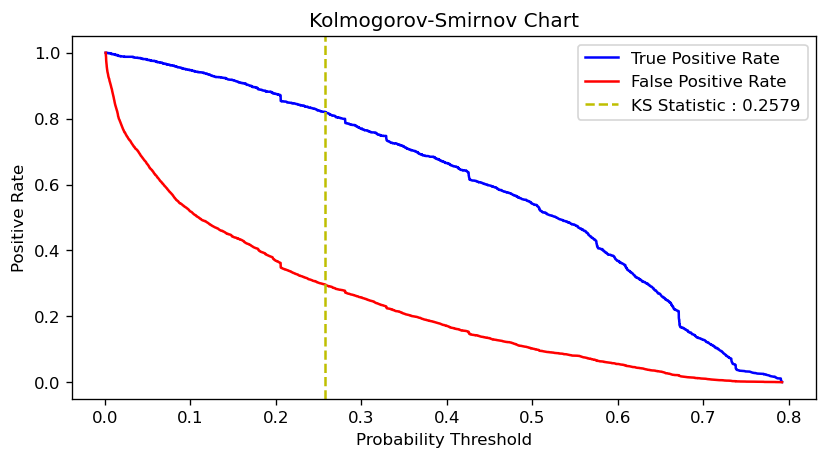

In [25]:
# Plot true positive and false positive rates as a line chart
plt.figure(figsize = (8,4), dpi = 120)

plt.plot(curve_coord['Threshold'], curve_coord['Sensitivity'], label='True Positive Rate', color = 'b')
plt.plot(curve_coord['Threshold'], curve_coord['OneMinusSpecificity'], label='False Positive Rate', color = 'r')
plt.axvline(x = ks_prob_thresh, color = 'y', linestyle='--', label = 'KS Statistic : '+str(round(ks_prob_thresh,4)))

plt.xlabel('Probability Threshold')
plt.ylabel('Positive Rate')
plt.title('Kolmogorov-Smirnov Chart')
plt.legend()
plt.show()

In [26]:

print("Kolmogorov-Smirnov statistic is {0} and the corresponding probability threshold for Churn is {1}"
      .format(ks_stat, ks_prob_thresh))


Kolmogorov-Smirnov statistic is 0.5244664390313967 and the corresponding probability threshold for Churn is 0.2579355595500369


In [27]:
print("Misclassification rate when the probability threshold is {0} is {1}".format(ks_prob_thresh, 
                            Regression.binary_model_metric (target = y, 
                                valueEvent = 1, 
                                valueNonEvent = 0,
                                predProbEvent = out_pr[6][1], eventProbThreshold = ks_prob_thresh)['MCE']))

Misclassification rate when the probability threshold is 0.2579355595500369 is 0.26493174061433444


b) Please generate the properly labeled Precision-Recall chart with a No-Skill line.
According to the F1 Score, what is the probability threshold for Churn? What is the misclassification
rate if we use this probability threshold?

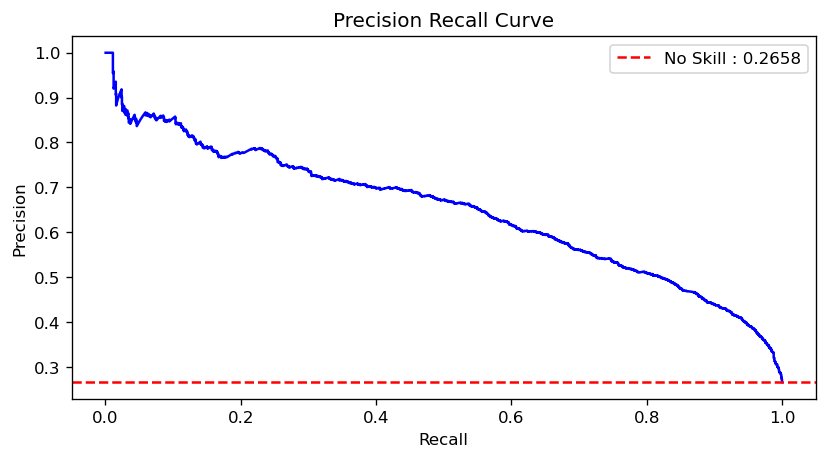

In [28]:
plt.figure(figsize = (8,4), dpi = 120)

# Create the plot
plt.plot(curve_coord['Recall'], curve_coord['Precision'], color='b')

# Add the no skill line
no_skill = y_train.value_counts()[1]/y_train.count()

plt.axhline(y = no_skill, color = 'red', linestyle='--', label='No Skill : '+str(round(no_skill,4)))


# Add axis labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

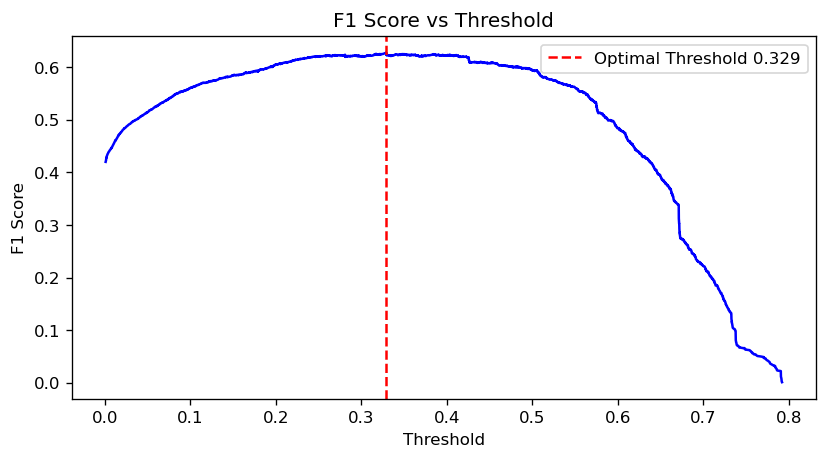

In [29]:
# Plot the F1 Score (vertical axis) versus the Threshold (horizontal axis) to determine the optimal threshold that gives the best F1 Score.
f1_thresh = curve_coord.loc[curve_coord['F1 Score'] == curve_coord['F1 Score'].max(), 'Threshold'].iloc[0]

plt.figure(figsize = (8,4), dpi = 120)

plt.plot(curve_coord['Threshold'], curve_coord['F1 Score'], color='b')

plt.axvline(x = f1_thresh, color = 'r', linestyle='--', label = 'Optimal Threshold '+str(round(f1_thresh,4)))

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.show()

In [30]:
print("According to the F1 Score {0}, the probability threshold for Churn is : {1}".format(curve_coord['F1 Score'].max(), f1_thresh))

According to the F1 Score 0.6274157303370785, the probability threshold for Churn is : 0.32902080792001165


In [31]:
print("Misclassification rate when the probability threshold is {0} is {1}".format(f1_thresh, 
                            Regression.binary_model_metric (target = y, 
                                valueEvent = 1, 
                                valueNonEvent = 0,
                                predProbEvent = out_pr[6][1], eventProbThreshold = f1_thresh)['MCE']))


Misclassification rate when the probability threshold is 0.32902080792001165 is 0.23577929465301478
